In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:

def create_frequency_grid(size):
    """Create a frequency grid for 2D filter visualization."""
    rows, cols = np.meshgrid(np.arange(size), np.arange(size))
    center_row, center_col = size // 2, size // 2
    return np.sqrt((rows - center_row)**2 + (cols - center_col)**2)

def ideal_lowpass(D, D0):
    """Implementation of ideal lowpass filter."""
    return (D <= D0).astype(float)

def butterworth_lowpass(D, D0, n):
    """Implementation of Butterworth lowpass filter."""
    return 1 / (1 + (D / D0)**(2 * n))

def gaussian_lowpass(D, D0):
    """Implementation of Gaussian lowpass filter."""
    return np.exp(-(D**2) / (2 * D0**2))

# Create example filters and visualize them
def visualize_filters(size=100, D0=20):
    D = create_frequency_grid(size)

    # Create filters
    ideal = ideal_lowpass(D, D0)
    butterworth = butterworth_lowpass(D, D0, n=2)
    gaussian = gaussian_lowpass(D, D0)

    # Set up the visualization
    fig = plt.figure(figsize=(15, 5))

    # Plot Ideal Lowpass
    ax1 = fig.add_subplot(131, projection='3d')
    X, Y = np.meshgrid(np.arange(size), np.arange(size))
    ax1.plot_surface(X, Y, ideal, cmap='viridis')
    ax1.set_title('Ideal Lowpass')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('H(u,v)')

    # Plot Butterworth Lowpass
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, Y, butterworth, cmap='viridis')
    ax2.set_title('Butterworth Lowpass')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('H(u,v)')

    # Plot Gaussian Lowpass
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, Y, gaussian, cmap='viridis')
    ax3.set_title('Gaussian Lowpass')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('H(u,v)')

    plt.tight_layout()
    plt.show()

# Example of applying filters to an image
def apply_filters_to_image(image_path):
    """Apply different lowpass filters to an image and show results."""
    # Read image and convert to grayscale if needed
    img = plt.imread(image_path)
    if len(img.shape) > 2:
        img = np.mean(img, axis=2)

    # Get image size and create frequency grid
    rows, cols = img.shape
    D = create_frequency_grid(rows)

    # Create filters
    D0 = 30  # Cutoff frequency
    ideal_filter = ideal_lowpass(D, D0)
    butterworth_filter = butterworth_lowpass(D, D0, n=2)
    gaussian_filter = gaussian_lowpass(D, D0)

    # Apply filters in frequency domain
    f_transform = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f_transform)

    # Apply each filter
    ideal_result = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift * ideal_filter)))
    butterworth_result = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift * butterworth_filter)))
    gaussian_result = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift * gaussian_filter)))

    # Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(141)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(ideal_result, cmap='gray')
    plt.title('Ideal Lowpass')

    plt.subplot(143)
    plt.imshow(butterworth_result, cmap='gray')
    plt.title('Butterworth Lowpass')

    plt.subplot(144)
    plt.imshow(gaussian_result, cmap='gray')
    plt.title('Gaussian Lowpass')

    plt.tight_layout()
    plt.show()



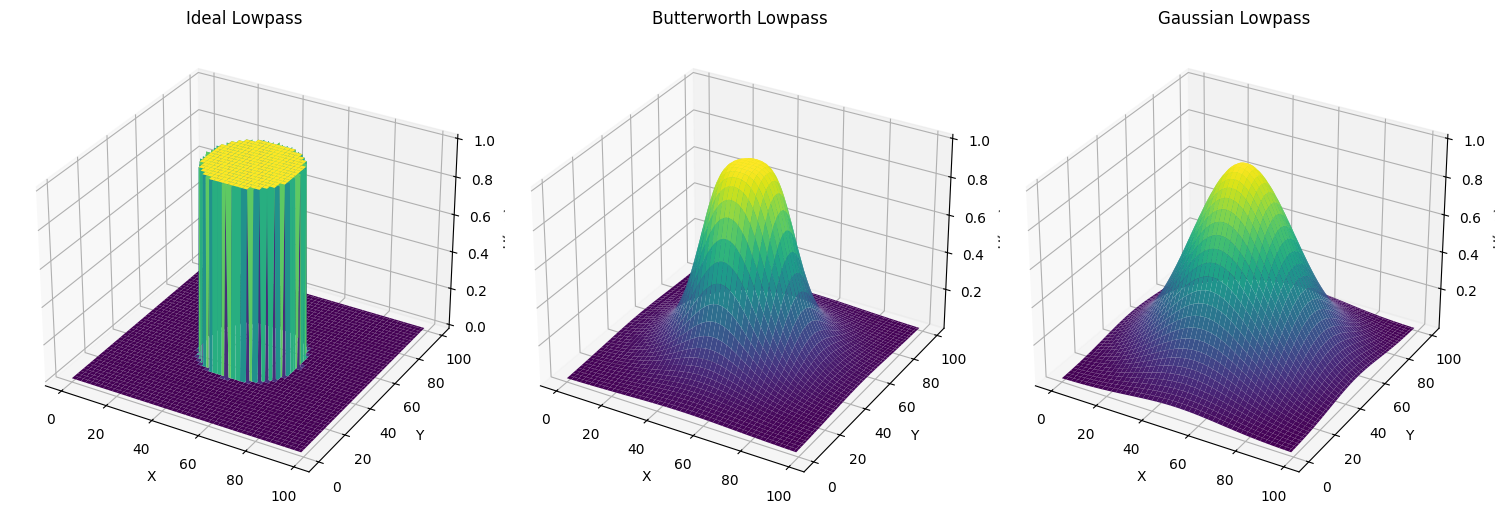

In [3]:
# Example usage:
if __name__ == "__main__":
    # Visualize filter responses in 3D
    visualize_filters()

    # If you have an image to process:
    # apply_filters_to_image('your_image.png')